In [ ]:
a = -29.3 - 0.26*0.2 +8.4*6

In [ ]:
a

In [3]:
import pandas as pd
import numpy as np

In [4]:
a = np.array([[11],[8]])

In [5]:
a.mean()

9.5

In [6]:
b = a - a.mean()

In [7]:
b

array([[ 1.5],
       [-1.5]])

In [8]:
c = np.linalg.norm(b) 
c

2.1213203435596424

In [9]:
1/c* b

array([[ 0.70710678],
       [-0.70710678]])

In [10]:
(1.5**2+1.5**2)**(1/2)

2.1213203435596424

In [11]:
import numpy as np # для работы с массивами
import pandas as pd # для работы DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline
df = pd.read_csv('./Admission_Predict_Ver1.1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [12]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [13]:
df = df.rename(columns={'Chance of Admit ': 'Chance of Admit'}, errors="raise")

In [14]:
y = df[['Chance of Admit']]
y.describe()

,Chance of Admit
count,500.00000
mean,0.72174
std,0.14114
min,0.34000
25%,0.63000
50%,0.72000
75%,0.82000
max,0.97000


In [15]:
np.linalg.det(df.corr())

0.0008425501159777749

In [16]:
C = df.corr(method='pearson')
C

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [17]:
C['Chance of Admit'].max()

1.0

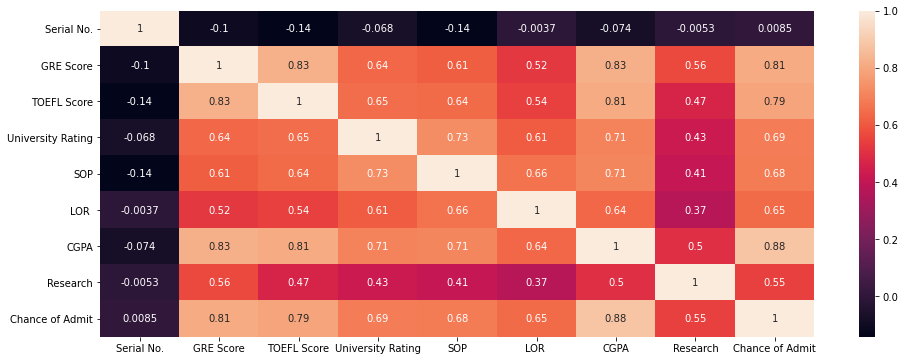

In [18]:
plt.figure(figsize=(16,6)) # размер графика
sns.heatmap(data=C, annot=True)

In [19]:
r0= df[df['Research'] == 0]

In [20]:
r0.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.165248,-0.185665,-0.093655,-0.199090,-0.018579,-0.138537,NaN,-0.002771
GRE Score,-0.165248,1.000000,0.680668,0.384715,0.371424,0.365864,0.678476,NaN,0.603827
TOEFL Score,-0.185665,0.680668,1.000000,0.495748,0.476563,0.470956,0.696774,NaN,0.622458
University Rating,-0.093655,0.384715,0.495748,1.000000,0.607496,0.484262,0.516427,NaN,0.428580
SOP,-0.199090,0.371424,0.476563,0.607496,1.000000,0.618680,0.547098,NaN,0.470188
LOR,-0.018579,0.365864,0.470956,0.484262,0.618680,1.000000,0.562517,NaN,0.542528
CGPA,-0.138537,0.678476,0.696774,0.516427,0.547098,0.562517,1.000000,NaN,0.752714
Research,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chance of Admit,-0.002771,0.603827,0.622458,0.428580,0.470188,0.542528,0.752714,NaN,1.000000


In [21]:
r1= df[df['Research'] == 1]

In [22]:
r1.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.094895,-0.140706,-0.058624,-0.109004,0.010475,-0.049214,NaN,0.024458
GRE Score,-0.094895,1.000000,0.824170,0.614739,0.613318,0.443374,0.806720,NaN,0.802439
TOEFL Score,-0.140706,0.824170,1.000000,0.602445,0.629436,0.436199,0.784173,NaN,0.787180
University Rating,-0.058624,0.614739,0.602445,1.000000,0.723126,0.573881,0.692237,NaN,0.713094
SOP,-0.109004,0.613318,0.629436,0.723126,1.000000,0.591858,0.717750,NaN,0.708238
LOR,0.010475,0.443374,0.436199,0.573881,0.591858,1.000000,0.564794,NaN,0.588558
CGPA,-0.049214,0.806720,0.784173,0.692237,0.717750,0.564794,1.000000,NaN,0.892489
Research,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chance of Admit,0.024458,0.802439,0.787180,0.713094,0.708238,0.588558,0.892489,NaN,1.000000


In [23]:
r0.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.165248,-0.185665,-0.093655,-0.199090,-0.018579,-0.138537,NaN,-0.002771
GRE Score,-0.165248,1.000000,0.680668,0.384715,0.371424,0.365864,0.678476,NaN,0.603827
TOEFL Score,-0.185665,0.680668,1.000000,0.495748,0.476563,0.470956,0.696774,NaN,0.622458
University Rating,-0.093655,0.384715,0.495748,1.000000,0.607496,0.484262,0.516427,NaN,0.428580
SOP,-0.199090,0.371424,0.476563,0.607496,1.000000,0.618680,0.547098,NaN,0.470188
LOR,-0.018579,0.365864,0.470956,0.484262,0.618680,1.000000,0.562517,NaN,0.542528
CGPA,-0.138537,0.678476,0.696774,0.516427,0.547098,0.562517,1.000000,NaN,0.752714
Research,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chance of Admit,-0.002771,0.603827,0.622458,0.428580,0.470188,0.542528,0.752714,NaN,1.000000


In [24]:
r0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 4 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         220 non-null    int64  
 1   GRE Score          220 non-null    int64  
 2   TOEFL Score        220 non-null    int64  
 3   University Rating  220 non-null    int64  
 4   SOP                220 non-null    float64
 5   LOR                220 non-null    float64
 6   CGPA               220 non-null    float64
 7   Research           220 non-null    int64  
 8   Chance of Admit    220 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 17.2 KB


In [25]:
A= np.column_stack((np.ones(220), r0['TOEFL Score'],r0.CGPA))
np.set_printoptions(suppress=True)
A

array([[  1.  , 103.  ,   8.21],
       [  1.  , 101.  ,   7.9 ],
       [  1.  , 102.  ,   8.  ],
       [  1.  , 108.  ,   8.6 ],
       [  1.  , 105.  ,   8.3 ],
       [  1.  , 107.  ,   8.7 ],
       [  1.  , 110.  ,   8.8 ],
       [  1.  , 102.  ,   8.5 ],
       [  1.  , 114.  ,   8.4 ],
       [  1.  , 109.  ,   8.8 ],
       [  1.  ,  93.  ,   7.2 ],
       [  1.  ,  99.  ,   7.3 ],
       [  1.  , 106.  ,   8.4 ],
       [  1.  , 105.  ,   7.8 ],
       [  1.  , 105.  ,   7.5 ],
       [  1.  , 108.  ,   7.7 ],
       [  1.  , 117.  ,   9.1 ],
       [  1.  , 119.  ,   9.7 ],
       [  1.  , 110.  ,   8.  ],
       [  1.  , 103.  ,   7.7 ],
       [  1.  , 102.  ,   7.4 ],
       [  1.  ,  99.  ,   7.6 ],
       [  1.  , 104.  ,   8.3 ],
       [  1.  , 100.  ,   8.1 ],
       [  1.  , 101.  ,   8.2 ],
       [  1.  , 111.  ,   8.7 ],
       [  1.  , 112.  ,   8.92],
       [  1.  , 114.  ,   9.02],
       [  1.  , 106.  ,   8.9 ],
       [  1.  ,  99.  ,   8.22],
       [  

In [26]:
q = np.linalg.lstsq(A,r0['Chance of Admit'],rcond=None)
q

(array([-1.04486443,  0.00442727,  0.14807744]),
 array([1.13772786]),
 3,
 array([1548.98055048,    5.02503482,    0.67532963]))

In [27]:
q = np.array(q[0])

In [28]:
new = np.array([1, 107, 9.1])

new@q.T

0.7763585301806972

In [29]:
w = np.array([-1.045, 0.005, 0.148])
new@w

0.8367999999999999

In [30]:
Astd = np.column_stack(
    (
    (r0['TOEFL Score']-r0['TOEFL Score'].mean())/np.linalg.norm(r0['TOEFL Score']),
    (r0.CGPA - r0.CGPA.mean())/np.linalg.norm(r0.CGPA)))
Astd

array([[-0.00064175, -0.00020212],
       [-0.00193702, -0.0027361 ],
       [-0.00128938, -0.00191869],
       [ 0.00259643,  0.00298578],
       [ 0.00065352,  0.00053355],
       [ 0.00194879,  0.00380319],
       [ 0.0038917 ,  0.0046206 ],
       [-0.00128938,  0.00216837],
       [ 0.00648224,  0.00135096],
       [ 0.00324406,  0.0046206 ],
       [-0.0071181 , -0.00845798],
       [-0.00323229, -0.00764056],
       [ 0.00130116,  0.00135096],
       [ 0.00065352, -0.00355351],
       [ 0.00065352, -0.00600574],
       [ 0.00259643, -0.00437092],
       [ 0.00842515,  0.00707284],
       [ 0.00972042,  0.0119773 ],
       [ 0.0038917 , -0.00191869],
       [-0.00064175, -0.00437092],
       [-0.00128938, -0.00682315],
       [-0.00323229, -0.00518833],
       [ 0.00000589,  0.00053355],
       [-0.00258465, -0.00110128],
       [-0.00193702, -0.00028386],
       [ 0.00453933,  0.00380319],
       [ 0.00518697,  0.0056015 ],
       [ 0.00648224,  0.00641891],
       [ 0.00130116,

In [31]:
q = np.linalg.lstsq(Astd,(r0['Chance of Admit'] - r0['Chance of Admit'].mean())/np.linalg.norm(r0['Chance of Admit']),rcond=None)

In [32]:
q

(array([0.71493762, 1.89456989]),
 array([0.01244409]),
 2,
 array([0.06762053, 0.02774482]))

In [33]:
TOEFL = r0['TOEFL Score']
CGPA = r0.CGPA
y = r0['Chance of Admit']
TOEFL_c = TOEFL - TOEFL.mean()

CGPA_c = CGPA - CGPA.mean()

y_c = y - y.mean()

TOEFL_st = TOEFL_c / np.linalg.norm(TOEFL_c)

CGPA_st = CGPA_c / np.linalg.norm(CGPA_c)

y_st = y_c / np.linalg.norm(y_c)

A_st=np.column_stack(( TOEFL_st, CGPA_st))

w_hat_st = np.linalg.inv(A_st.T@A_st)@A_st.T@y_st.values

w_hat_st

array([0.19044768, 0.62001517])

In [34]:
a = np.array([[1,0,0],[0,0,1],[0,-1,0]])
b = np.array([[1],[2],[3]])
a@b

array([[ 1],
       [ 3],
       [-2]])

In [35]:
a = np.array([[2,1],[1,2]])
b = np.array([[1],[1]])
a@b

array([[3],
       [3]])

In [36]:
a = np.array([[7,2],[1,8]])
b = np.array([[2],[-1]])
a@b

array([[12],
       [-6]])

In [37]:
np.linalg.det(a)

54.00000000000001

In [38]:
a

array([[7, 2],
       [1, 8]])

In [39]:
from sklearn.decomposition import PCA
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
from sklearn import datasets # для импорта данных
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline
pca = PCA(n_components = 1)
#XPCAreduced = pca.fit_transform(transpose(X))

In [40]:
# загружаем датасет
boston = datasets.load_boston()
bostonDF=pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE']=boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [41]:
Data = bostonDF
Data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [42]:

a = Data['RM'].mean()
RM_c = Data['RM'] -  Data['RM'].mean()
CRIM_c = Data['CRIM'] -  Data['CRIM'].mean()
CRIM_c_norm = np.linalg.norm(CRIM_c)
RM_c_norm = np.linalg.norm(RM_c)
y_c_norm = np.linalg.norm(y_c)
# Нормирование: делим каждый центрированный вектор на его длину
CRIM_st=CRIM_c / CRIM_c_norm
RM_st=RM_c / RM_c_norm
y_st=y_c / y_c_norm

# Матрица центрированных признаков - БЕЗ константы!
A_st=np.column_stack(( CRIM_st, RM_st,))
A_st

array([[-0.01866158,  0.01838996],
       [-0.01855299,  0.00863655],
       [-0.0185531 ,  0.05702358],
       ...,
       [-0.01837994,  0.04378681],
       [-0.01812732,  0.03226006],
       [-0.01844901, -0.01612696]])

In [43]:
x = np.array([[1,2,1,1], [70,130,65,60]])

x = x.T
x

array([[  1,  70],
       [  2, 130],
       [  1,  65],
       [  1,  60]])

In [44]:
a = pd.DataFrame(x).corr()
a

,0,1
0,1.000000,0.992203
1,0.992203,1.000000


In [55]:
y = x - x.mean(axis=0)

y


array([[ -0.25, -11.25],
       [  0.75,  48.75],
       [ -0.25, -16.25],
       [ -0.25, -21.25]])

In [56]:
y.T[0] = y.T[0] / np.linalg.norm(y.T[0])
y.T[1] = y.T[1] / np.linalg.norm(y.T[1])
y

array([[-0.28867513, -0.19829369],
       [ 0.8660254 ,  0.85927267],
       [-0.28867513, -0.28642422],
       [-0.28867513, -0.37455475]])

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
StandardScaler().fit_transform(x)


array([[-0.57735027, -0.39658738],
       [ 1.73205081,  1.71854533],
       [-0.57735027, -0.57284844],
       [-0.57735027, -0.7491095 ]])

In [48]:
StandardScaler().fit_transform(x.T)

array([[-1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1.]])

In [54]:
 StandardScaler().fit_transform(y)

array([[-0.57735027, -0.39658738],
       [ 1.73205081,  1.71854533],
       [-0.57735027, -0.57284844],
       [-0.57735027, -0.7491095 ]])

In [50]:
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])
principalDf

,principal component 1
0,-11.252496
1,48.755767
2,-16.251922
3,-21.251349


In [51]:
np.cov(x.transpose(), bias=1)

array([[  0.1875,  12.1875],
       [ 12.1875, 804.6875]])

In [52]:
np.linalg.eig(np.cov(y, bias=1))

(array([ 0.00389869,  0.        ,  0.        , -0.        ]),
 array([[ 0.72375178,  0.69006041,  0.60322098, -0.69005829],
        [-0.05407422,  0.05671433, -0.41755601, -0.05666597],
        [ 0.01802474, -0.01890478,  0.11009381,  0.02137778],
        [-0.6877023 ,  0.72127854,  0.67056005, -0.7212153 ]]))

In [53]:
XPCAreduced = pca.fit(y.T[0], y.T[1])
XPCAreduced

ValueError: Expected 2D array, got 1D array instead:
array=[-0.28867513  0.8660254  -0.28867513 -0.28867513].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.